# Case Study - Wine Quality Prediction

# Context
This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) 
variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are 
much more normal wines than excellent or poor ones).

# Dataset:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository: https://archive.ics.uci.edu/ml/datasets/wine+quality 

# Problem Statement:
    
Wine Quality Prediction- Here, we will apply a method of assessing wine quality using a decision tree, and test it against the 
wine-quality dataset from the UC Irvine Machine Learning Repository.
The wine dataset is a classic and very easy multi-class classification dataset.

## Number of Instances: red wine - 1599

## Attribute information:
  - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)

## Missing Attribute Values: None

### Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)


# Import all necessary modules and load the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')

# Print first 10 observations from the dataset

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
5,7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,5
6,7.90,0.60,0.06,1.60,0.07,15.00,59.00,1.00,3.30,0.46,9.40,5
7,7.30,0.65,0.00,1.20,0.07,15.00,21.00,0.99,3.39,0.47,10.00,7
8,7.80,0.58,0.02,2.00,0.07,9.00,18.00,1.00,3.36,0.57,9.50,7
9,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Print the datatypes of each column and the shape of the dataset

In [4]:
df.shape

(1599, 12)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Print the descriptive statistics of each & every column using describe() function

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,"1,599.00",8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,"1,599.00",0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,"1,599.00",0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,"1,599.00",2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,"1,599.00",0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,"1,599.00",15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,"1,599.00",46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,"1,599.00",1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,"1,599.00",3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,"1,599.00",0.66,0.17,0.33,0.55,0.62,0.73,2.00


# Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc.
What are your observations (any two attributes).

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


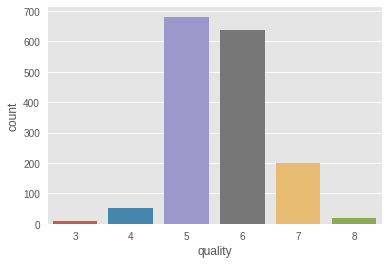

In [7]:
sns.countplot(df['quality'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


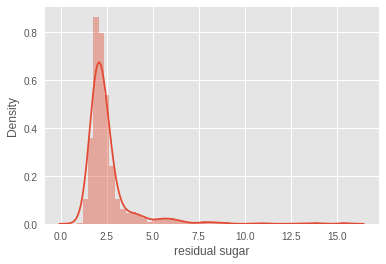

In [8]:
sns.distplot(df['residual sugar'])

# Use correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

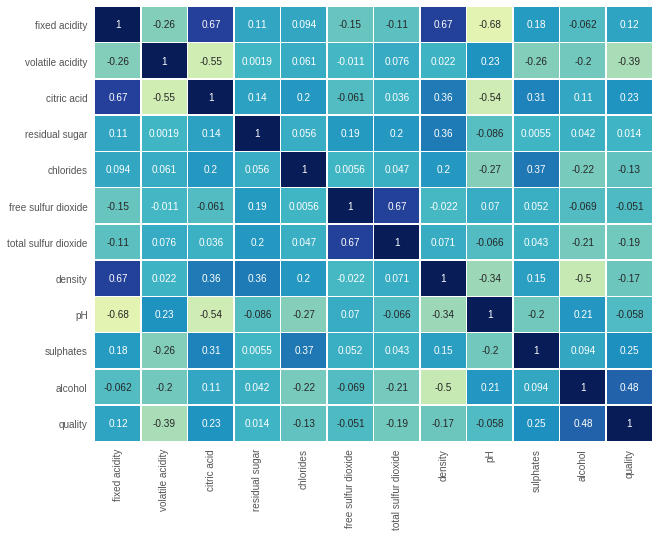

In [9]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [10]:
#levels of Y variable
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
#Combine 7&8 together; combine 3 and 4 with 5 so that we have only 3 levels and a more balanced Y variable
mapping = {7:8, 3:5, 4:5}

df['quality'] = df['quality'].replace(mapping)
df['quality'].value_counts()

5    744
6    638
8    217
Name: quality, dtype: int64

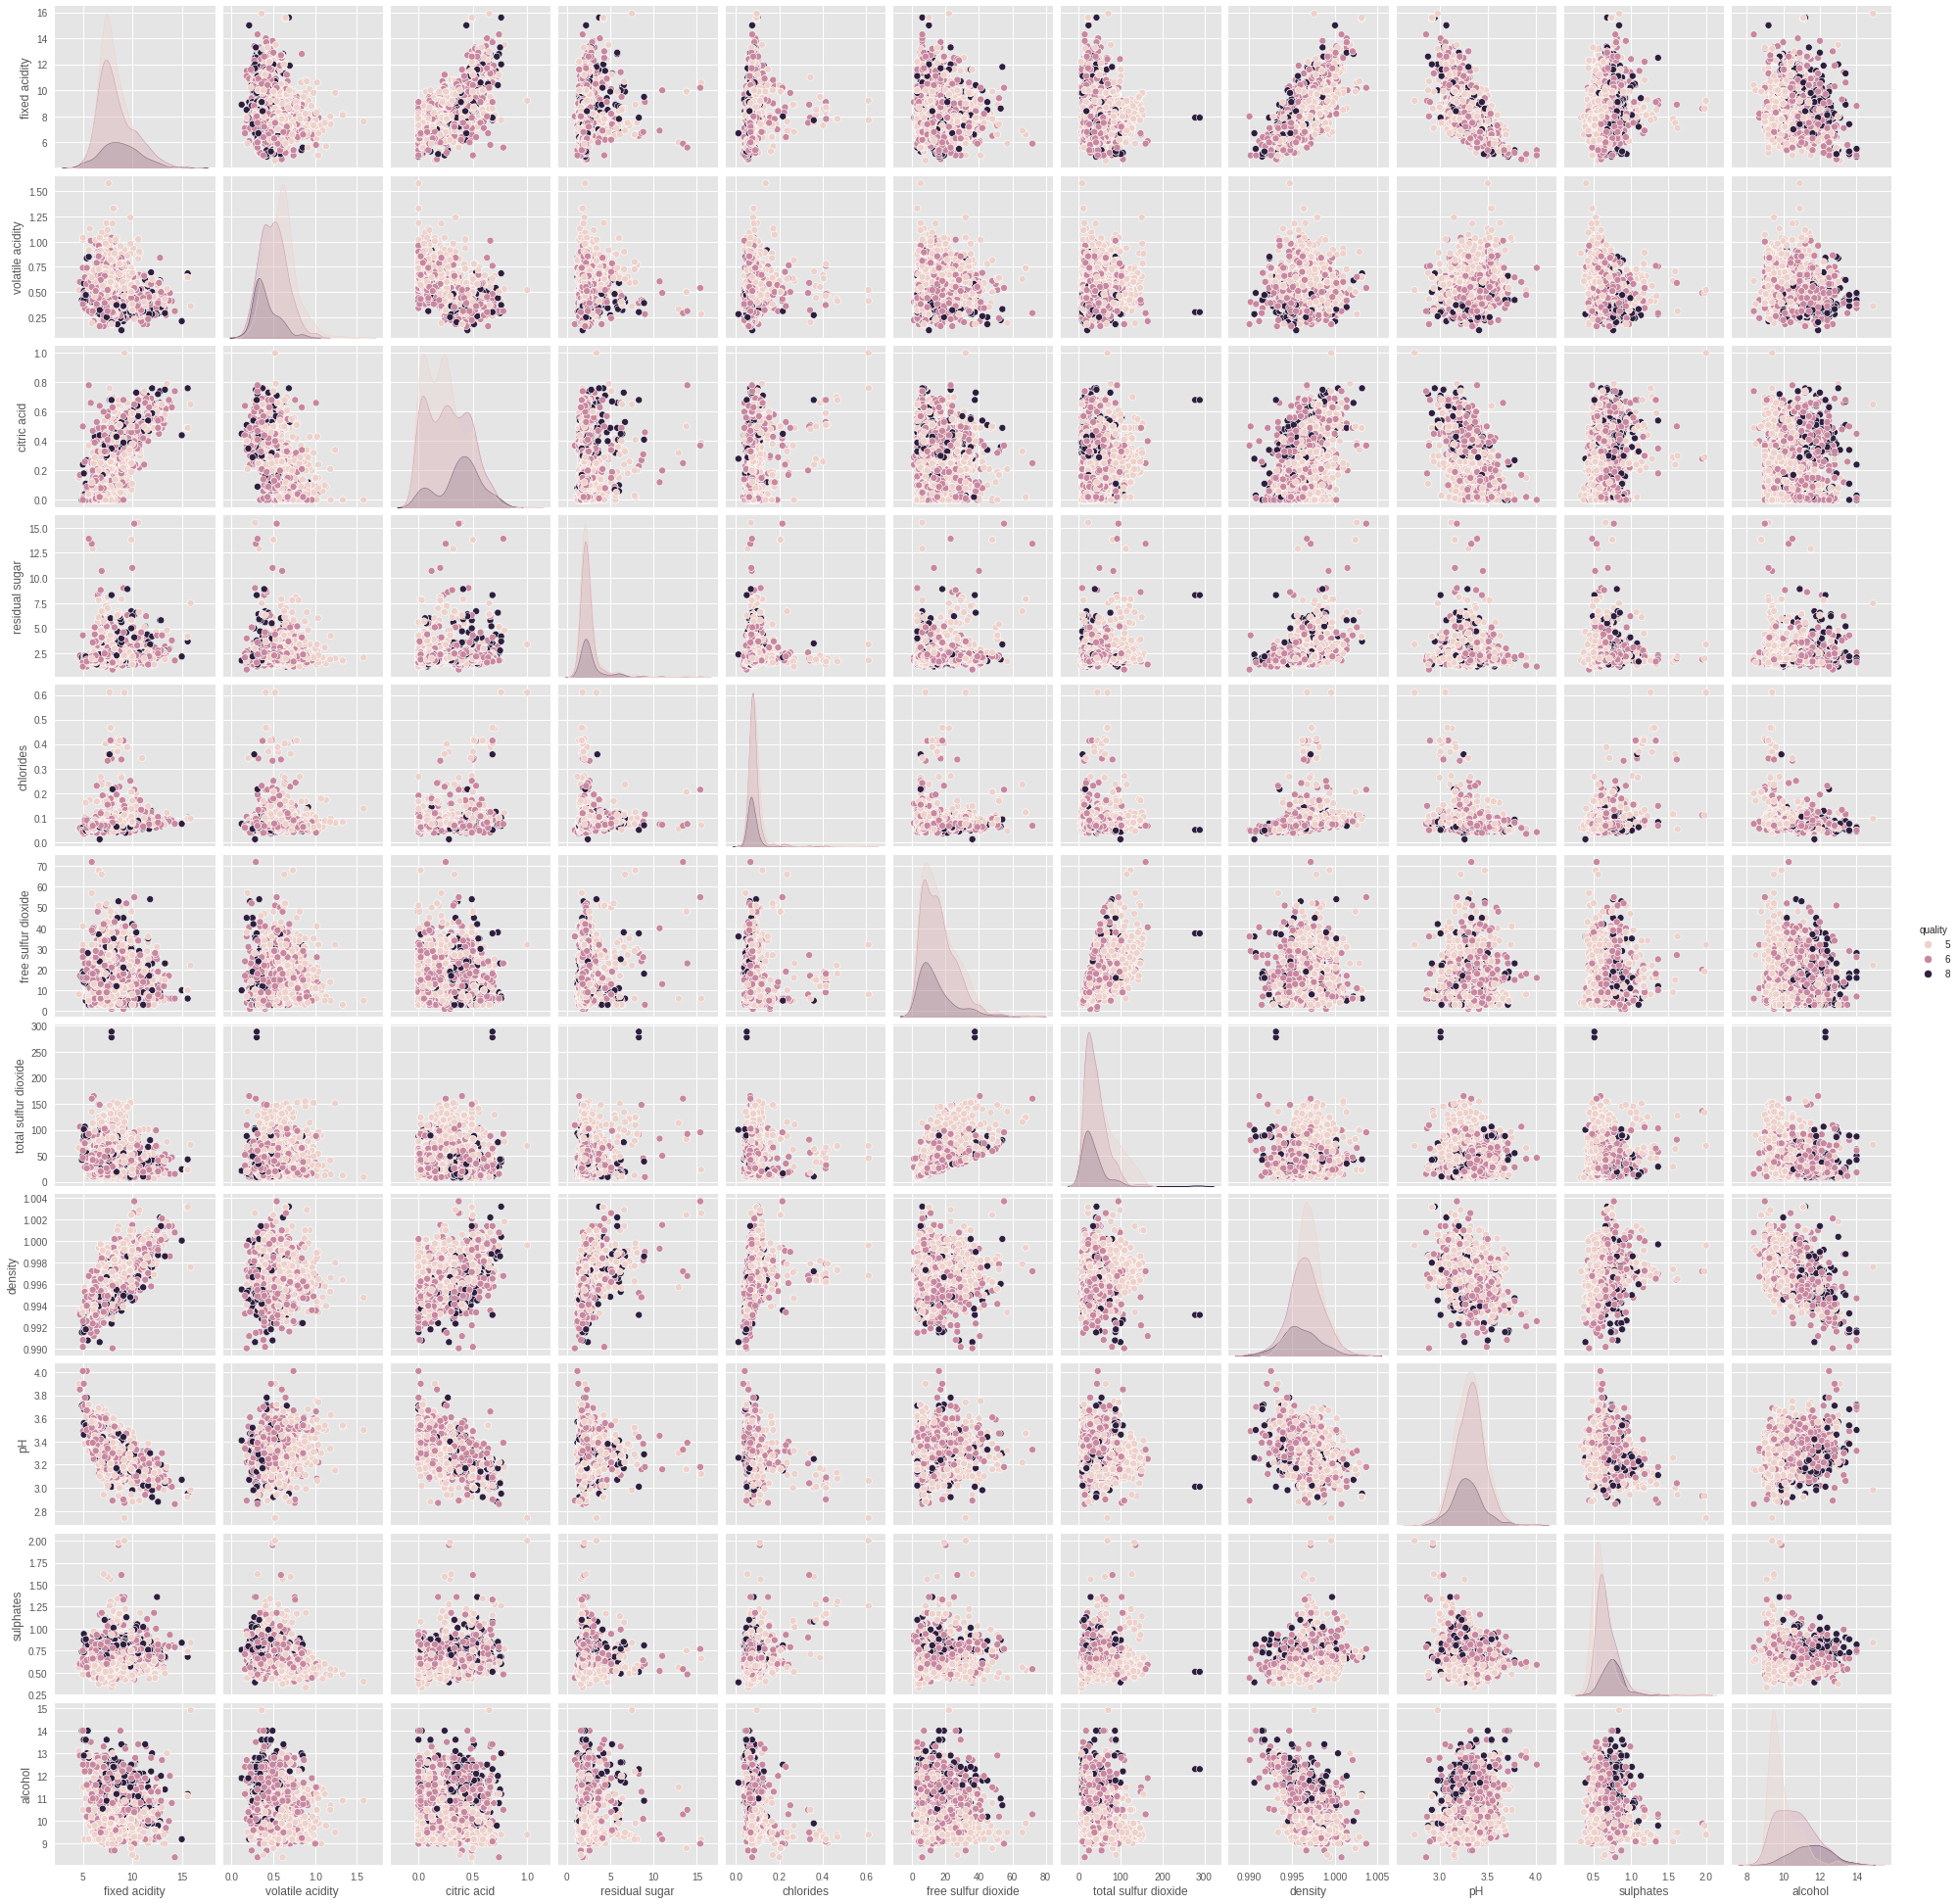

In [12]:
sns.pairplot(df, hue = 'quality')

#### Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.

In [13]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

features = [col for col in df.columns if col != 'quality']

X_train, X_test, y_train, y_test = train_test_split(df[features], df['quality'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((1119, 11), (480, 11))

## Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [14]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [15]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Print the accuracy of the model & print the confusion matrix

In [16]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.64


#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting. 

#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [17]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.65
Test: 0.62


## Visualizing the tree

### You might need to install pydotplus and graphviz packages for visualising the tree. 

In [19]:
y_train.value_counts()

5    514
6    448
8    157
Name: quality, dtype: int64

In [20]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


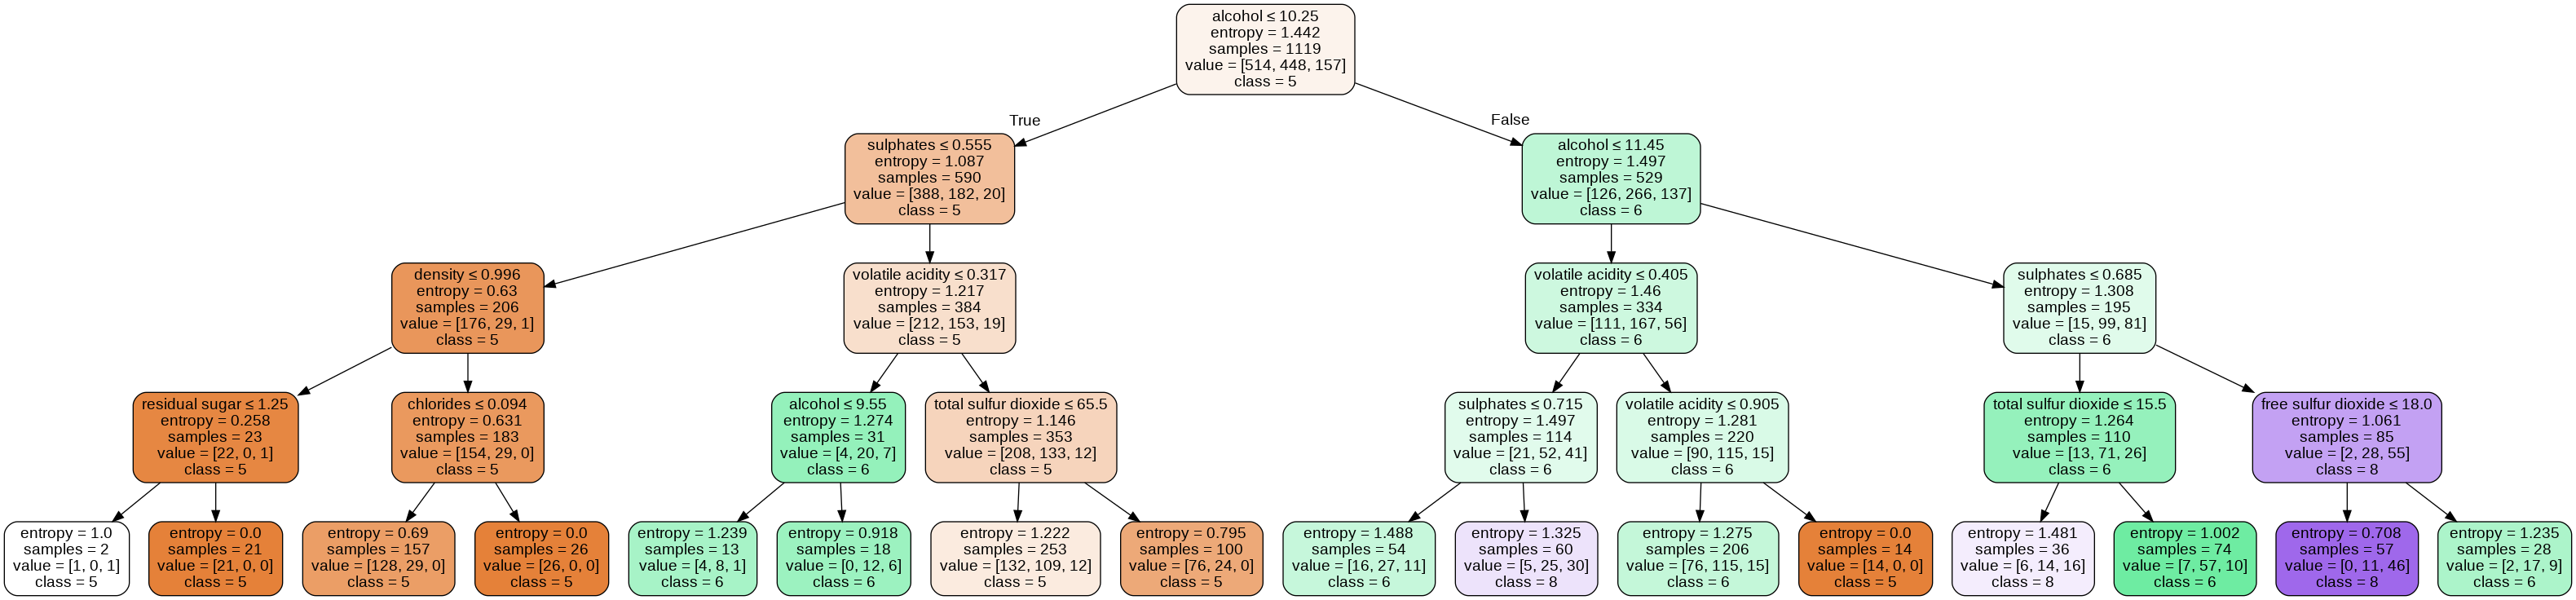

In [21]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['5','6','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_pruned.png')
Image(graph.create_png())

In [22]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

## Decision tree performance

In [23]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,5,6,8
Actual,,,
5,167,57,6
6,70,98,22
8,5,23,32


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f88acf60>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7f15f88acd68>,
                     model=None, support=None)

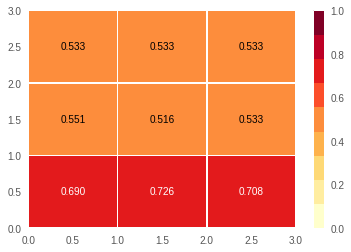

In [24]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f89851d0>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

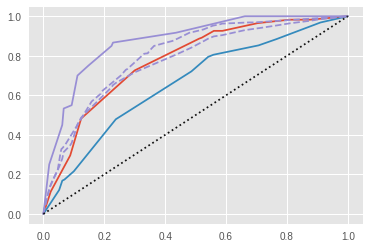

In [25]:
roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

#### Performance metrics

- __Precision__: Fraction of actuals per label that were correctly classified by the model
- __Recall__: Fraction of predictions that were correctly classified by the model
- __F1-score__: Weighted harmonic mean of the precision and recall. F1-score: 2 * (precision * recall) / (precision + recall)
- __Support__: Number of occurrences of each class in y_test
- __Accuracy__: Fraction of all observations that were correctly classified by the model
- __Macro avg__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
- __Micro/weighted avg__: Calculate metrics globally by counting the total true positives, false negatives and false positives
- __AUC Score__: Given a random observation from the dataset that belongs to a class, and a random observation that doesn't belong to a class, the AUC is the perecentage of time that our model will classify which is which correctly

In [26]:
df['ProbQuality_5'] = clf_pruned.predict_proba(df[features])[:,0]
df['ProbQuality_6'] = clf_pruned.predict_proba(df[features])[:,1]
df['ProbQuality_8'] = clf_pruned.predict_proba(df[features])[:,2]
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ProbQuality_5,ProbQuality_6,ProbQuality_8
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0.52,0.43,0.05
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,0.76,0.24,0.00
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,0.52,0.43,0.05
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,0.00,0.67,0.33
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0.52,0.43,0.05
5,7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,5,0.52,0.43,0.05
6,7.90,0.60,0.06,1.60,0.07,15.00,59.00,1.00,3.30,0.46,9.40,5,0.82,0.18,0.00
7,7.30,0.65,0.00,1.20,0.07,15.00,21.00,0.99,3.39,0.47,10.00,8,0.50,0.00,0.50
8,7.80,0.58,0.02,2.00,0.07,9.00,18.00,1.00,3.36,0.57,9.50,8,0.52,0.43,0.05
9,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5,0.37,0.56,0.07


### When the tree is regularised, overfitting is reduced, but there is no increase in accuracy

In [27]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
alcohol,0.52
sulphates,0.18
volatile acidity,0.17
total sulfur dioxide,0.06
free sulfur dioxide,0.03
density,0.02
chlorides,0.02
residual sugar,0.01
fixed acidity,0.00
citric acid,0.00


#### From the feature importance dataframe we can infer that alcohol, sulphate, volatile acidity and total sulfur dioxide are the variables that impact wine quality

In [28]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.62


### Apply the Random forest model and print the accuracy of Random forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [30]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [31]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.62
0,Random Forest,0.72


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f857b588>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7f15f856db00>,
                     model=None, support=None)

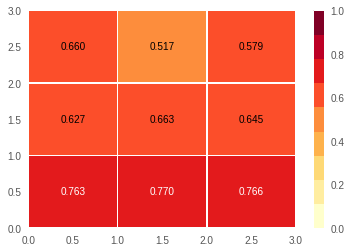

In [32]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f84a1438>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

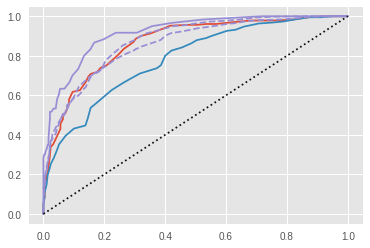

In [33]:
roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

#### Compared to the decision tree, we can see that the accuracy has significantly improved for the Random forest model

## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [34]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [35]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [36]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.62
0,Random Forest,0.72
0,Adaboost,0.62


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f8448f60>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7f15f8434da0>,
                     model=None, support=None)

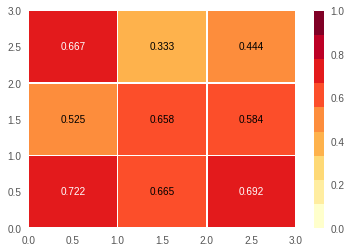

In [37]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f8385a20>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

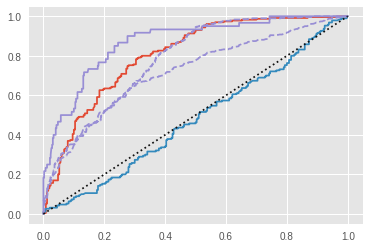

In [38]:
roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

### Apply Bagging Classifier Algorithm and print the accuracy.

In [39]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [40]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [41]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.62
0,Random Forest,0.72
0,Adaboost,0.62
0,Bagging,0.68


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f81654e0>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7f15f82f1eb8>,
                     model=None, support=None)

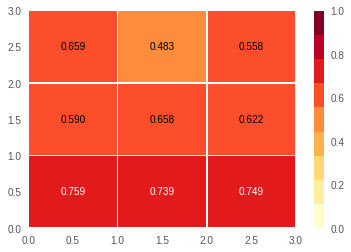

In [43]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f8113668>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

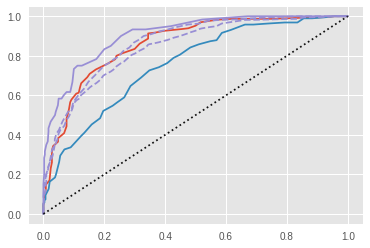

In [44]:
roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [46]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [47]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.62
0,Random Forest,0.72
0,Adaboost,0.62
0,Bagging,0.68
0,Gradient Boost,0.64


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f801e7b8>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7f15f8066940>,
                     model=None, support=None)

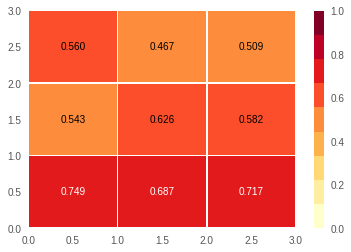

In [48]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f7fcfef0>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

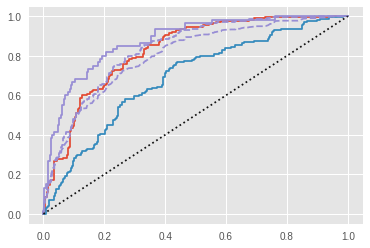

In [49]:
roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

#### For this dataset, Random forest and bagging models give the best results on test predictions

In [50]:
# Creating a function for visualizing classifier results
def ClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz

def ROCAUCscore(model_w_parameters):
    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc

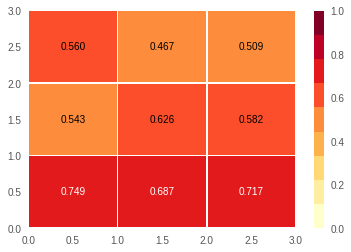

In [51]:
ClassifierResults(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

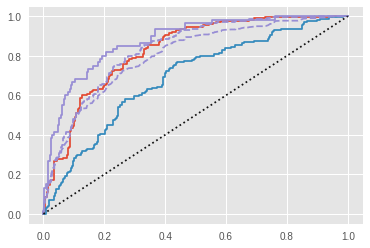

In [52]:
ROCAUCscore(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

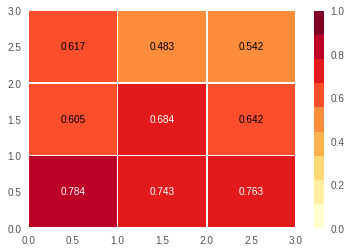

In [53]:
ClassifierResults(RandomForestClassifier(n_estimators = 50))

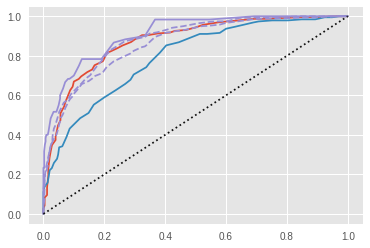

In [54]:
ROCAUCscore(RandomForestClassifier(n_estimators = 50))